# diagram overview

In [ ]:
# ---------------------------------------------
# 📦 INSTALL ALL REQUIRED LIBRARIES
# ---------------------------------------------
%pip install numpy pandas matplotlib seaborn plotly wordcloud autoviz sweetviz ydata-profiling scikit-learn

# ---------------------------------------------
# 📚 IMPORT LIBRARIES
# ---------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from datetime import datetime
import warnings

# Plotly for interactive visualizations
import plotly.express as px
import plotly.graph_objects as go

# WordCloud for text visualization
from wordcloud import WordCloud

# AutoViz, Sweetviz, and YData Profiling for EDA (Exploratory Data Analysis)
import autoviz
import sweetviz
from ydata_profiling import ProfileReport

# Optional settings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-muted')


ImportError: cannot import name '_slice' from 'numpy._core.umath' (m:\restaurant-health-master\env\Lib\site-packages\numpy\_core\umath.py)

In [ ]:
df=pd.read_csv('resturent.csv')
df.head()

,user_id,business_id,stars_user,useful_review,funny_review,cool_review,review,date,name_user,review_count_user,...,stars_business,review_count_business,is_open,attributes,categories,hours,checkin_count,tip_count,tip_compliment_count_avg,address
0,ecrYpAcwE22gWVsWoNvthQ,pqe1pCQx--uybdm6EQ8AqQ,3.0,0,0,0,I love elevation burger but they need to clean...,2016-01-06 21:32:21,Beatriz,2,...,3.0,202,0,"{'RestaurantsPriceRange2': '1', 'NoiseLevel': ...","American (New), Vegetarian, Restaurants, Burgers","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,33.0,0.000000,"50 E Wynnewood Rd, Wynnewood, PA 19096 | Lat: ..."
1,-psFb4sFsOm0oRLY2Kye0A,AdT6vMVYy2uFFfnYbWoAsw,5.0,0,0,0,This is by far the best pizza place in Henders...,2015-05-17 00:43:46,Nathan,28,...,4.0,123,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,15.0,0.000000,"305 Indian Lake Blvd, Hendersonville, TN 37075..."
2,IoS8IZai5Yfa3ULgO1ktKw,Ix9p19oZJOdaIGjU9lElyA,2.0,1,0,0,I've heard a lot about Five Guys for years and...,2012-04-29 01:40:46,Jerry,132,...,3.5,35,1,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Fast Food, Restaurants, American (New), Burgers","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1.0,5.0,0.000000,"127 G Rte 130 S, South Cinnaminson, NJ 08077 |..."
3,VhcRO_eyARVDRKvrLLJuCQ,GBTPC53ZrG1ZBY3DT8Mbcw,5.0,0,0,0,"Rich and Kenny were awesome. Hilarious guys, a...",2018-08-15 02:44:18,Colton,13,...,4.0,4554,1,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",1.0,608.0,0.009868,"333 Saint Charles Ave, New Orleans, LA 70130 |..."
4,iIMs--XG4bKVI9V55ZUNbw,MmIF3ZlBPwOknea6-IzlQg,5.0,0,0,0,I've been asking for a Chic Fila to be built i...,2014-08-26 16:59:31,Heather,122,...,3.5,134,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Sandwiches, Salad, Chicken Shop, Restaurants, ...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',...",1.0,22.0,0.045455,"10441 Big Bend Rd, Riverview, FL 33579 | Lat: ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23555 entries, 0 to 23554
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   23555 non-null  object 
 1   business_id               23555 non-null  object 
 2   stars_user                23555 non-null  float64
 3   useful_review             23555 non-null  int64  
 4   funny_review              23555 non-null  int64  
 5   cool_review               23555 non-null  int64  
 6   review                    23555 non-null  object 
 7   date                      23555 non-null  object 
 8   name_user                 23555 non-null  object 
 9   review_count_user         23555 non-null  int64  
 10  yelping_since             23555 non-null  object 
 11  useful_user               23555 non-null  int64  
 12  funny_user                23555 non-null  int64  
 13  cool_user                 23555 non-null  int64  
 14  friend

In [ ]:
df.describe()

,stars_user,useful_review,funny_review,cool_review,review_count_user,useful_user,funny_user,cool_user,fans,average_stars,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,stars_business,review_count_business,is_open,checkin_count,tip_count,tip_compliment_count_avg
count,23555.000000,23555.000000,23555.000000,23555.000000,23555.000000,23555.000000,23555.000000,23555.000000,23555.000000,23555.000000,...,23555.000000,23555.000000,23555.000000,23555.000000,23555.000000,23555.000000,23555.000000,23509.0,23313.000000,23313.000000
mean,3.843260,0.773127,0.244959,0.340989,119.471068,308.307790,117.893016,187.355763,9.545786,3.796230,...,10.881681,24.782212,19.489705,19.489705,3.780662,449.497007,0.736532,1.0,64.686784,0.012510
std,1.314082,1.667301,0.944737,1.075189,337.140216,2244.143673,1209.104384,1809.915817,51.528721,0.714868,...,97.027778,261.967715,198.372688,198.372688,0.607266,647.705653,0.440524,0.0,89.662762,0.034456
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.0,1.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,10.000000,5.000000,1.000000,1.000000,0.000000,3.470000,...,0.000000,0.000000,0.000000,0.000000,3.500000,92.000000,0.000000,1.0,14.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,29.000000,23.000000,4.000000,6.000000,1.000000,3.880000,...,0.000000,0.000000,0.000000,0.000000,4.000000,228.000000,1.000000,1.0,32.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000,96.000000,111.000000,26.000000,37.000000,4.000000,4.240000,...,3.000000,3.000000,2.000000,2.000000,4.000000,519.000000,1.000000,1.0,76.000000,0.011976
max,5.000000,46.000000,30.000000,42.000000,16567.000000,173089.000000,98459.000000,144849.000000,2388.000000,5.000000,...,8616.000000,11756.000000,13280.000000,13280.000000,5.000000,4554.000000,1.000000,1.0,608.000000,1.000000


In [ ]:
df.notnull().sum()


user_id                     23555
business_id                 23555
stars_user                  23555
useful_review               23555
funny_review                23555
cool_review                 23555
review                      23555
date                        23555
name_user                   23555
review_count_user           23555
yelping_since               23555
useful_user                 23555
funny_user                  23555
cool_user                   23555
friends                     18083
fans                        23555
average_stars               23555
compliment_hot              23555
compliment_more             23555
compliment_profile          23555
compliment_cute             23555
compliment_list             23555
compliment_note             23555
compliment_plain            23555
compliment_cool             23555
compliment_funny            23555
name_business               23555
stars_business              23555
review_count_business       23555
is_open       

In [ ]:
df.head()

,user_id,business_id,stars_user,useful_review,funny_review,cool_review,review,date,name_user,review_count_user,...,stars_business,review_count_business,is_open,attributes,categories,hours,checkin_count,tip_count,tip_compliment_count_avg,address
0,ecrYpAcwE22gWVsWoNvthQ,pqe1pCQx--uybdm6EQ8AqQ,3.0,0,0,0,I love elevation burger but they need to clean...,2016-01-06 21:32:21,Beatriz,2,...,3.0,202,0,"{'RestaurantsPriceRange2': '1', 'NoiseLevel': ...","American (New), Vegetarian, Restaurants, Burgers","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,33.0,0.000000,"50 E Wynnewood Rd, Wynnewood, PA 19096 | Lat: ..."
1,-psFb4sFsOm0oRLY2Kye0A,AdT6vMVYy2uFFfnYbWoAsw,5.0,0,0,0,This is by far the best pizza place in Henders...,2015-05-17 00:43:46,Nathan,28,...,4.0,123,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,15.0,0.000000,"305 Indian Lake Blvd, Hendersonville, TN 37075..."
2,IoS8IZai5Yfa3ULgO1ktKw,Ix9p19oZJOdaIGjU9lElyA,2.0,1,0,0,I've heard a lot about Five Guys for years and...,2012-04-29 01:40:46,Jerry,132,...,3.5,35,1,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Fast Food, Restaurants, American (New), Burgers","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1.0,5.0,0.000000,"127 G Rte 130 S, South Cinnaminson, NJ 08077 |..."
3,VhcRO_eyARVDRKvrLLJuCQ,GBTPC53ZrG1ZBY3DT8Mbcw,5.0,0,0,0,"Rich and Kenny were awesome. Hilarious guys, a...",2018-08-15 02:44:18,Colton,13,...,4.0,4554,1,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",1.0,608.0,0.009868,"333 Saint Charles Ave, New Orleans, LA 70130 |..."
4,iIMs--XG4bKVI9V55ZUNbw,MmIF3ZlBPwOknea6-IzlQg,5.0,0,0,0,I've been asking for a Chic Fila to be built i...,2014-08-26 16:59:31,Heather,122,...,3.5,134,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Sandwiches, Salad, Chicken Shop, Restaurants, ...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',...",1.0,22.0,0.045455,"10441 Big Bend Rd, Riverview, FL 33579 | Lat: ..."


In [ ]:
for column in df.columns:
  unique_values=df[column].unique()
  print(f'uique value in {column}: ',unique_values)

uique value in user_id:  ['ecrYpAcwE22gWVsWoNvthQ' '-psFb4sFsOm0oRLY2Kye0A'
 'IoS8IZai5Yfa3ULgO1ktKw' ... 'kRc5fRDabRZhd6X9Uca2jQ'
 'UG5eec8Cw5zn1RnZKvYhqg' 'JEx81AlNgiBuaJwurx9Bsg']
uique value in business_id:  ['pqe1pCQx--uybdm6EQ8AqQ' 'AdT6vMVYy2uFFfnYbWoAsw'
 'Ix9p19oZJOdaIGjU9lElyA' ... 'cbRRzQyV60C9-dSnJITa6A'
 'InI2O9i59galnR563-A9oA' 'j-PaHu9iyJBlzKJZYN2smA']
uique value in stars_user:  [3. 5. 2. 4. 1.]
uique value in useful_review:  [ 0  1  2  4  3  5  6  8 13  7 18  9 12 10 17 11 14 45 15 21 28 19 33 20
 31 24 40 29 46 23 34]
uique value in funny_review:  [ 0  4  1  5  3  2 13  6 10  7 12 11 28 20 18  8 21 15 14 30  9 17 16]
uique value in cool_review:  [ 0  1  3  2  4 13  5  8  9  6  7 14 10 11 42 12 18 23 17 33 15 29 16 21]
uique value in review:  ["I love elevation burger but they need to clean the restaurant better. There's little flys everywhere"
 'This is by far the best pizza place in Hendersonville! If your looking for NY style pizza this place is legit. Garlic knots 

Text(0.5, 1.0, 'stars_user')

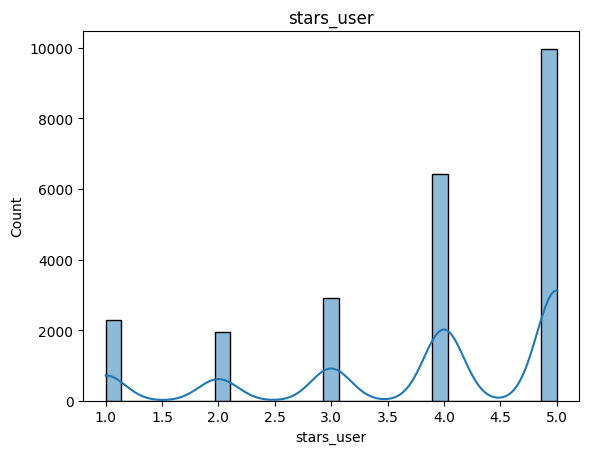

In [ ]:

fig,ax=plt.subplots()
sns.histplot(df['stars_user'],kde=True)
plt.title('stars_user')

Text(0.5, 1.0, 'date')

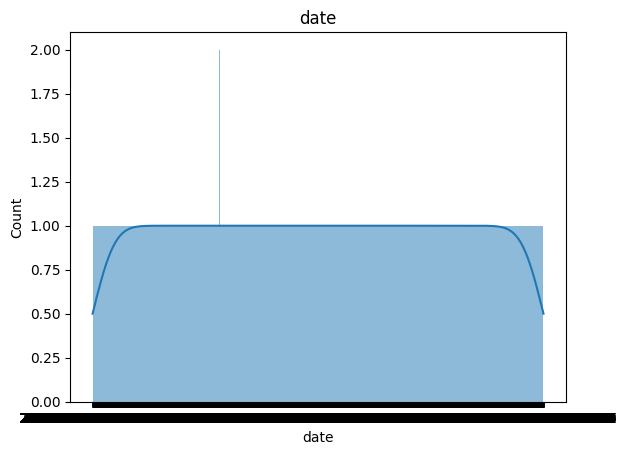

In [ ]:

fig,ax=plt.subplots()
sns.histplot(df['date'],kde=True)
plt.title('date')

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23555 entries, 0 to 23554
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   23555 non-null  object 
 1   business_id               23555 non-null  object 
 2   stars_user                23555 non-null  float64
 3   useful_review             23555 non-null  int64  
 4   funny_review              23555 non-null  int64  
 5   cool_review               23555 non-null  int64  
 6   review                    23555 non-null  object 
 7   date                      23555 non-null  object 
 8   name_user                 23555 non-null  object 
 9   review_count_user         23555 non-null  int64  
 10  yelping_since             23555 non-null  object 
 11  useful_user               23555 non-null  int64  
 12  funny_user                23555 non-null  int64  
 13  cool_user                 23555 non-null  int64  
 14  friend

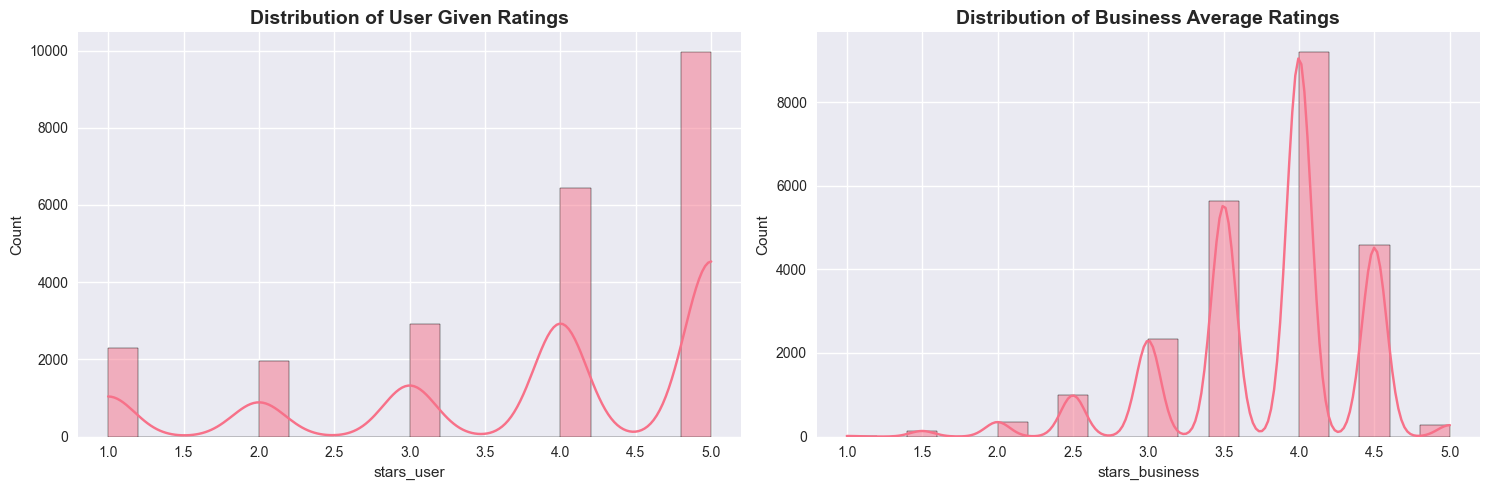

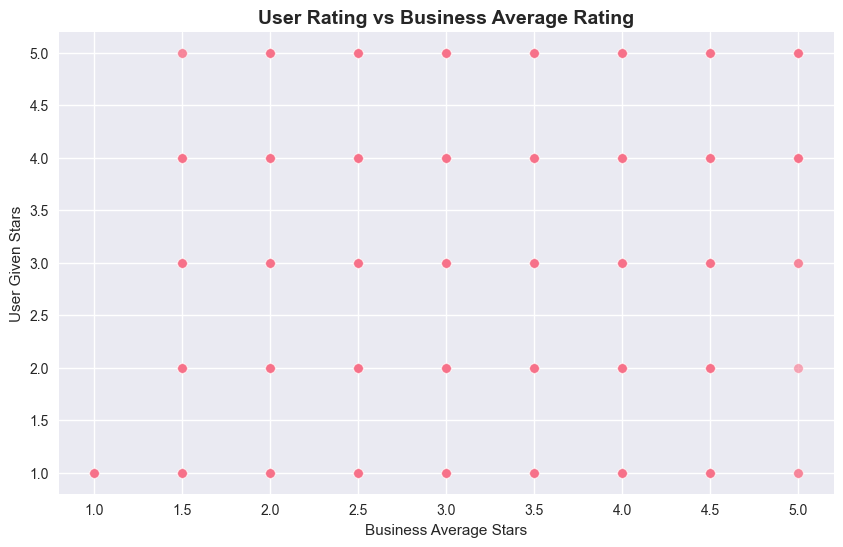

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# User vs Business ratings
sns.histplot(data=df, x='stars_user', bins=20, ax=axes[0], kde=True)
axes[0].set_title('Distribution of User Given Ratings', fontsize=14, fontweight='bold')

sns.histplot(data=df, x='stars_business', bins=20, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Business Average Ratings', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Rating comparison
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stars_business', y='stars_user', alpha=0.6)
plt.title('User Rating vs Business Average Rating', fontsize=14, fontweight='bold')
plt.xlabel('Business Average Stars')
plt.ylabel('User Given Stars')
plt.show()

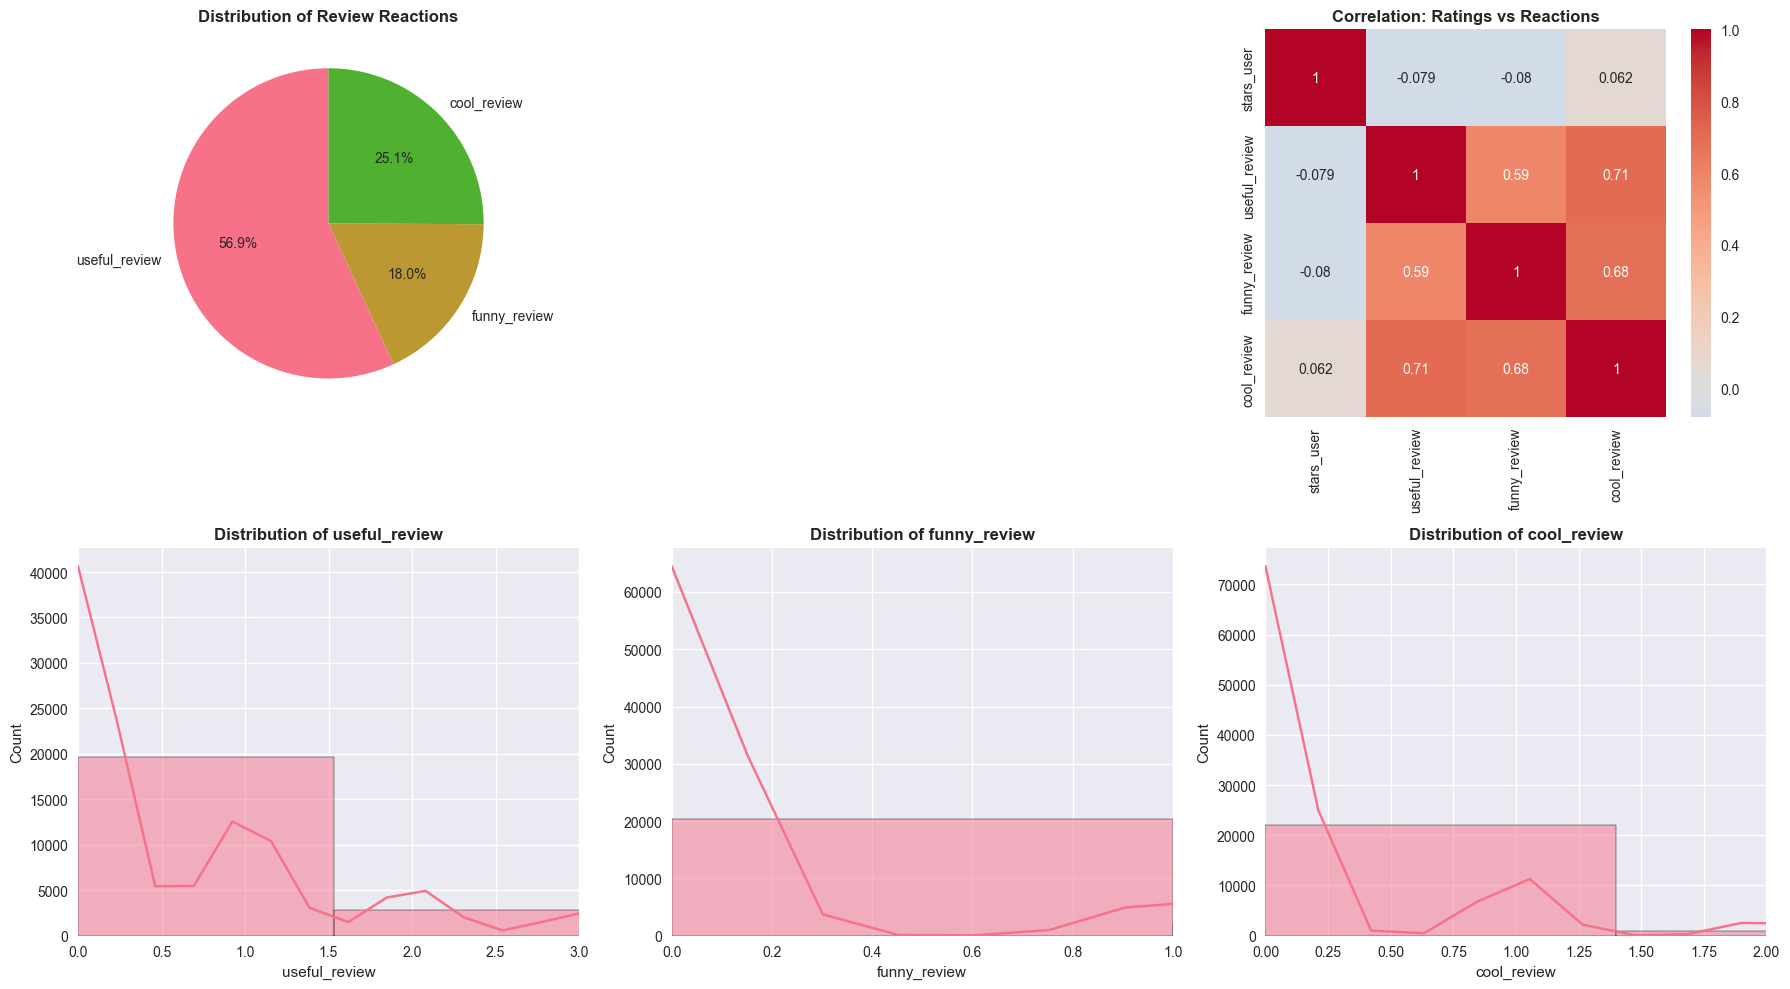

In [ ]:
# Review reaction analysis - Better layout
reaction_cols = ['useful_review', 'funny_review', 'cool_review']
reaction_data = df[reaction_cols]

# Calculate correlation matrix with the correct column name
rating_cols = ['stars_user']  # Changed from 'stars' to 'stars_user'
corr_cols = rating_cols + reaction_cols
corr_matrix = df[corr_cols].corr()

# Create 2x3 grid for better organization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Pie chart - top left
reaction_totals = reaction_data.sum()
axes[0,0].pie(reaction_totals, labels=reaction_totals.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Review Reactions', fontweight='bold')

# Correlation heatmap - span two columns
axes[0,1].axis('off')  # Hide the middle top subplot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,2])
axes[0,2].set_title('Correlation: Ratings vs Reactions', fontweight='bold')

# Individual reaction distributions - bottom row
for i, col in enumerate(reaction_cols):
    sns.histplot(data=df, x=col, ax=axes[1,i], bins=30, kde=True)
    axes[1,i].set_title(f'Distribution of {col}', fontweight='bold')
    axes[1,i].set_xlim(0, df[col].quantile(0.95))

plt.tight_layout()
plt.show()

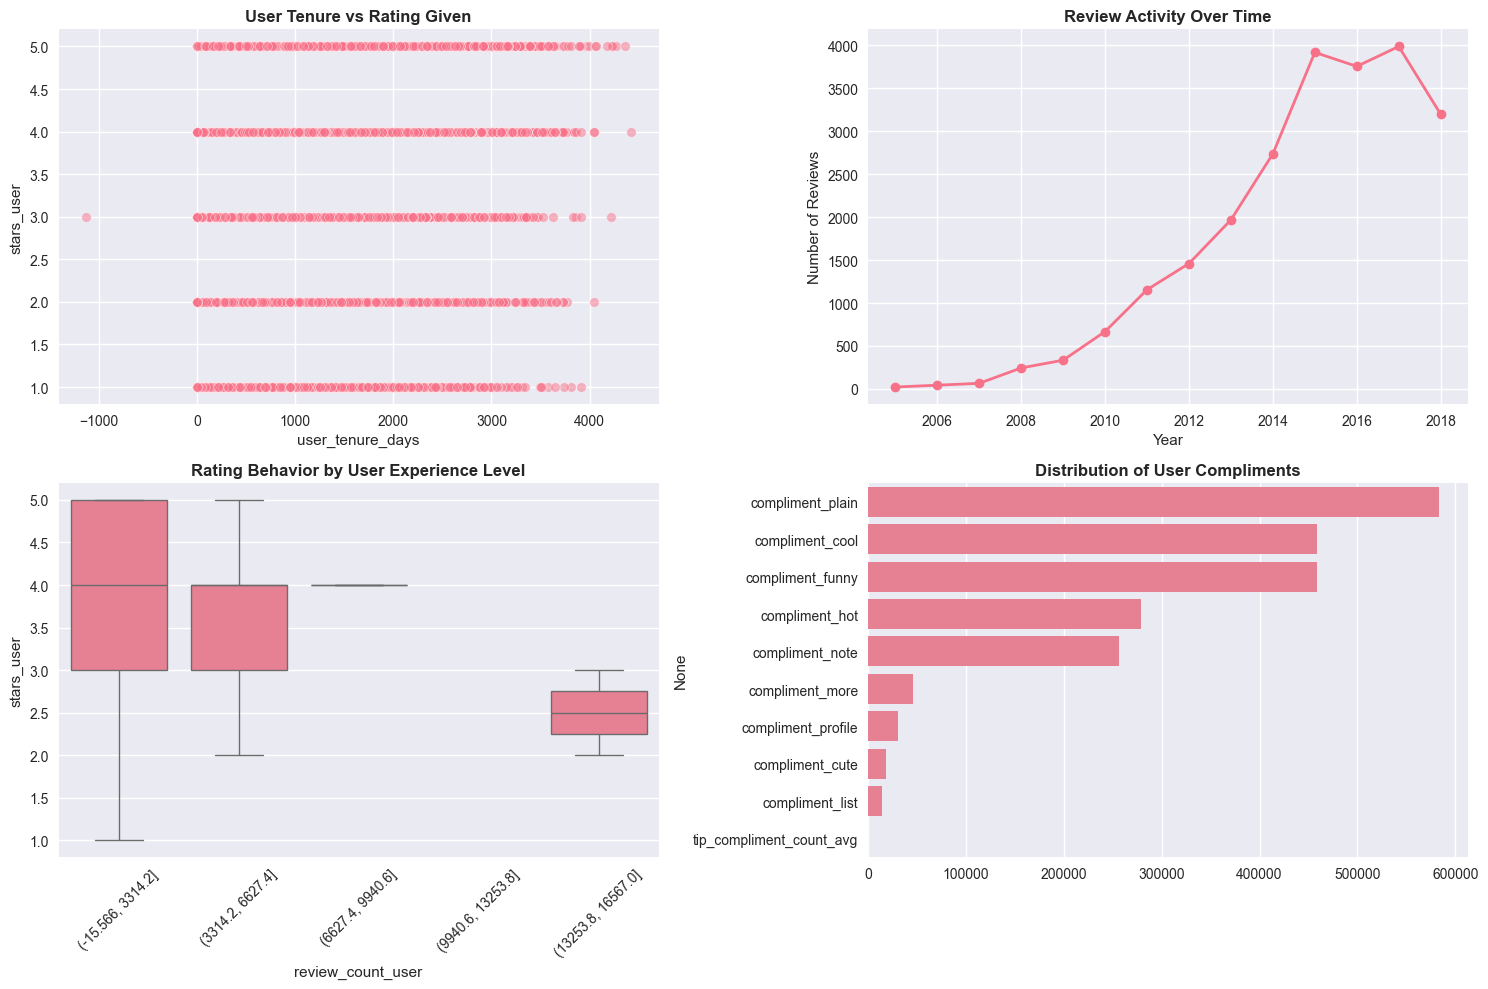

In [ ]:
# Convert date columns
df['date'] = pd.to_datetime(df['date'])
df['yelping_since'] = pd.to_datetime(df['yelping_since'])

# User tenure analysis
df['user_tenure_days'] = (df['date'] - df['yelping_since']).dt.days

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# User tenure vs rating behavior
sns.scatterplot(data=df, x='user_tenure_days', y='stars_user', alpha=0.5, ax=axes[0,0])
axes[0,0].set_title('User Tenure vs Rating Given', fontweight='bold')

# Review activity over years
df['review_year'] = df['date'].dt.year
yearly_reviews = df['review_year'].value_counts().sort_index()
axes[0,1].plot(yearly_reviews.index, yearly_reviews.values, marker='o', linewidth=2)
axes[0,1].set_title('Review Activity Over Time', fontweight='bold')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Number of Reviews')

# User experience level vs rating
sns.boxplot(data=df, x=pd.cut(df['review_count_user'], bins=5), y='stars_user', ax=axes[1,0])
axes[1,0].set_title('Rating Behavior by User Experience Level', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# User compliment analysis
compliment_cols = [col for col in df.columns if 'compliment' in col]
compliment_totals = df[compliment_cols].sum().sort_values(ascending=False)
sns.barplot(x=compliment_totals.values, y=compliment_totals.index, ax=axes[1,1])
axes[1,1].set_title('Distribution of User Compliments', fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_13120\4128457323.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(['Closed', 'Open'])


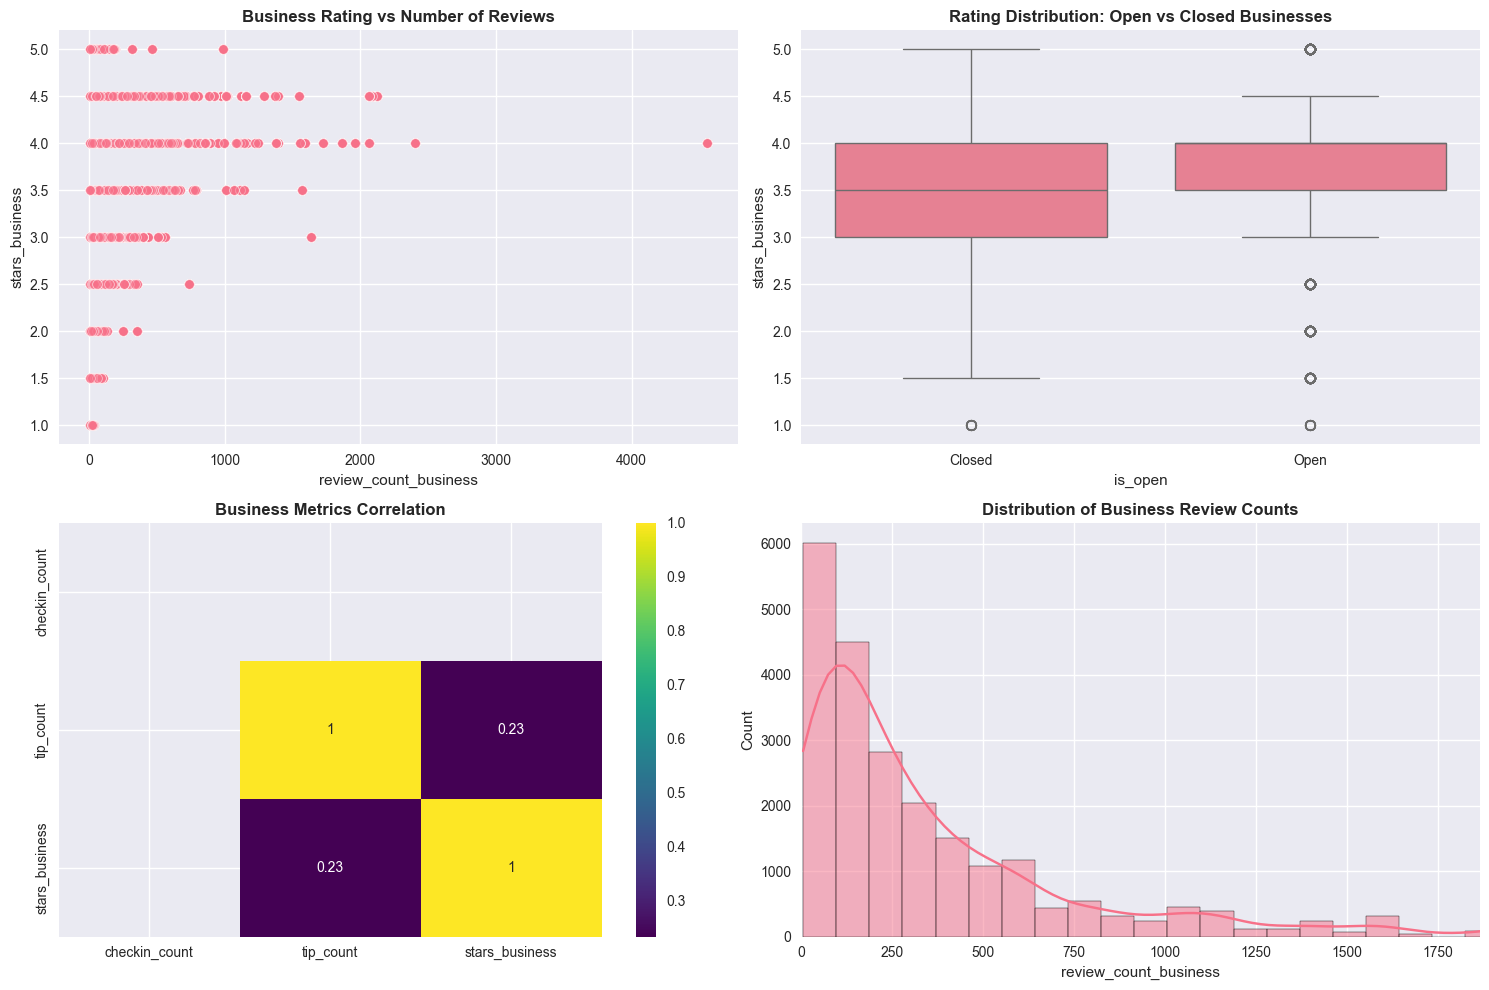

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Business rating vs review count
sns.scatterplot(data=df, x='review_count_business', y='stars_business', alpha=0.6, ax=axes[0,0])
axes[0,0].set_title('Business Rating vs Number of Reviews', fontweight='bold')

# Open vs closed businesses rating distribution
sns.boxplot(data=df, x='is_open', y='stars_business', ax=axes[0,1])
axes[0,1].set_title('Rating Distribution: Open vs Closed Businesses', fontweight='bold')
axes[0,1].set_xticklabels(['Closed', 'Open'])

# Check-in and tip analysis
business_metrics = df[['checkin_count', 'tip_count', 'stars_business']].corr()
sns.heatmap(business_metrics, annot=True, cmap='viridis', ax=axes[1,0])
axes[1,0].set_title('Business Metrics Correlation', fontweight='bold')

# Review count distribution for businesses
sns.histplot(data=df, x='review_count_business', bins=50, ax=axes[1,1], kde=True)
axes[1,1].set_title('Distribution of Business Review Counts', fontweight='bold')
axes[1,1].set_xlim(0, df['review_count_business'].quantile(0.95))

plt.tight_layout()
plt.show()

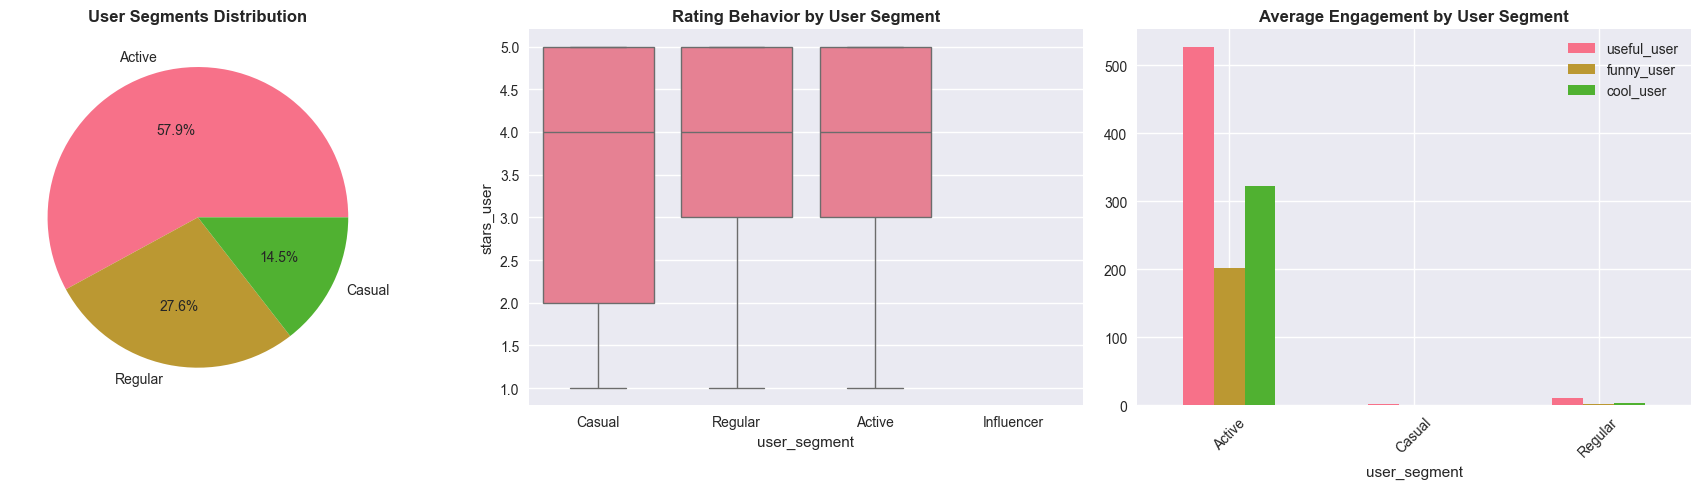

In [ ]:
# Create user segments based on activity and influence
conditions = [
    (df['review_count_user'] <= 5) & (df['fans'] <= 1),
    (df['review_count_user'] <= 20) & (df['fans'] <= 5),
    (df['review_count_user'] > 20) | (df['fans'] > 5),
    (df['review_count_user'] > 50) | (df['fans'] > 20)
]
segments = ['Casual', 'Regular', 'Active', 'Influencer']
df['user_segment'] = np.select(conditions, segments, default='Influencer')

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Segment distribution
segment_counts = df['user_segment'].value_counts()
axes[0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
axes[0].set_title('User Segments Distribution', fontweight='bold')

# Average rating by segment
sns.boxplot(data=df, x='user_segment', y='stars_user', order=segments, ax=axes[1])
axes[1].set_title('Rating Behavior by User Segment', fontweight='bold')

# Engagement metrics by segment
engagement_by_segment = df.groupby('user_segment')[['useful_user', 'funny_user', 'cool_user']].mean()
engagement_by_segment.plot(kind='bar', ax=axes[2])
axes[2].set_title('Average Engagement by User Segment', fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import plotly.io as pio
pio.renderers.default = "browser"  # Opens in default web browser

# Your existing code
fig = px.scatter(df, x='review_count_user', y='fans', 
                 color='user_segment', size='average_stars',
                 hover_data=['name_user', 'yelping_since'],
                 title='User Experience vs Influence',
                 labels={'review_count_user': 'Review Count', 'fans': 'Number of Fans'})
fig.show()

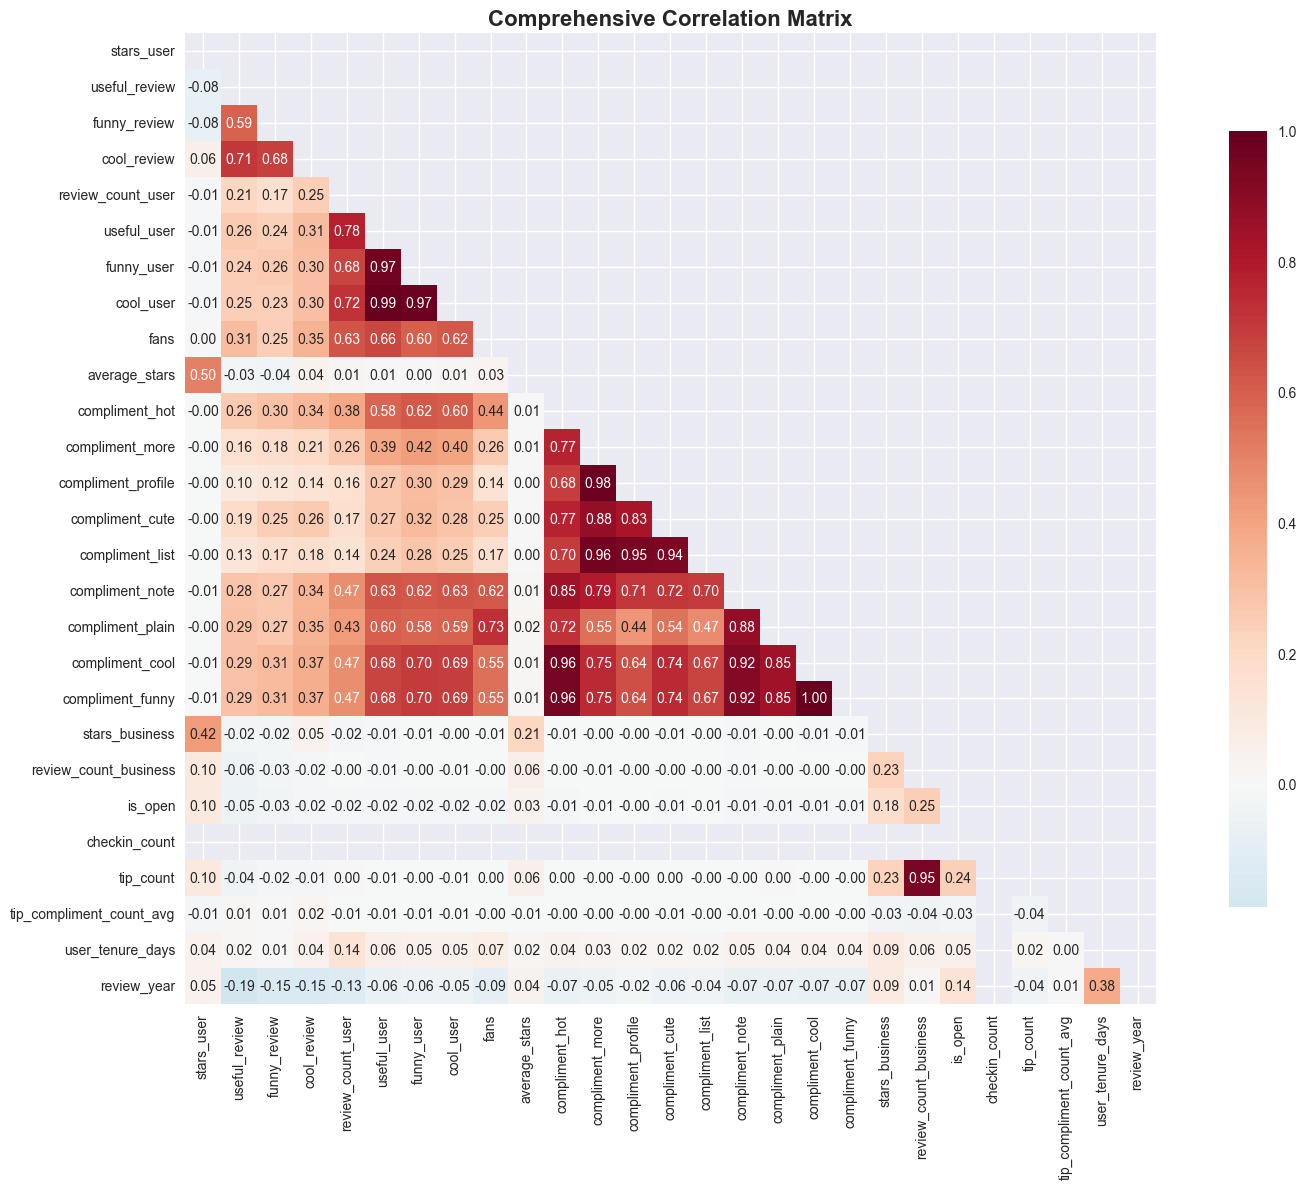

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Comprehensive Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

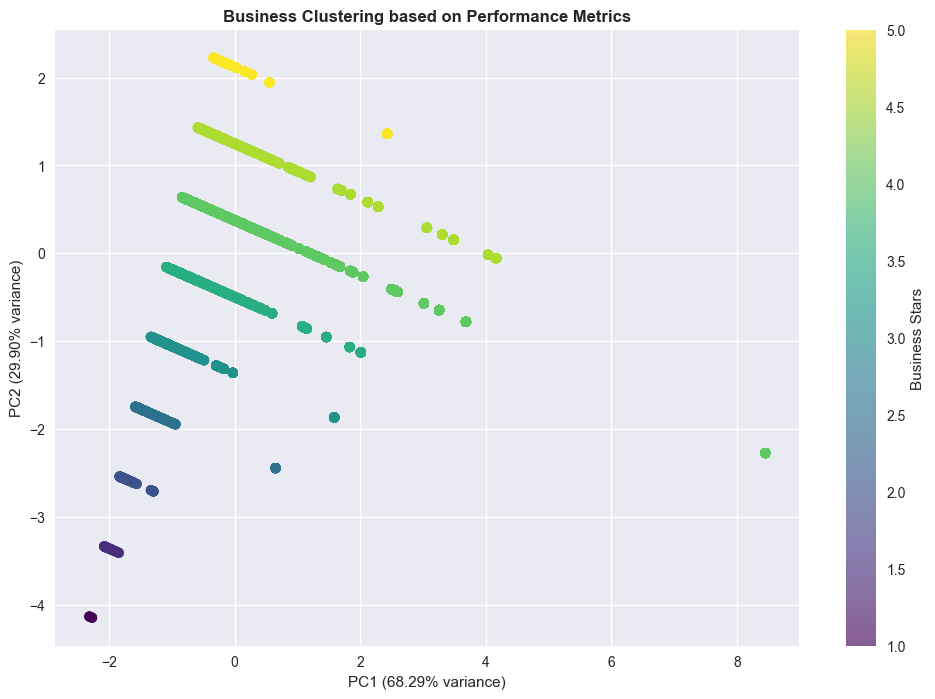

In [ ]:
# Prepare data for business clustering
business_features = ['stars_business', 'review_count_business', 'checkin_count', 'tip_count']
business_data = df[business_features].dropna()

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(business_data)

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                     c=df.loc[business_data.index, 'stars_business'], 
                     alpha=0.6, cmap='viridis')
plt.colorbar(scatter, label='Business Stars')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Business Clustering based on Performance Metrics', fontweight='bold')
plt.show()

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use Agg backend instead of SVG
from ydata_profiling import ProfileReport

# Generate the profile report with minimal configuration
prof = ProfileReport(df, 
                    title='Restaurant Health Data Analysis',
                    minimal=True,  # Use minimal configuration to reduce complexity
                    plot={'image_format': 'png'},  # Use PNG instead of SVG
                    progress_bar=False)  # Disable progress bar to reduce dependencies
prof.to_file('output.html')

100%|██████████| 37/37 [00:06<00:00,  5.43it/s]



In [ ]:
# Install required dependencies
%pip install matplotlib
%pip install --upgrade ydata-profiling[notebook]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Create a basic data profiling report
import pandas as pd
import numpy as np

def create_basic_profile(df):
    profile = {}
    
    # Basic DataFrame info
    profile['shape'] = df.shape
    profile['columns'] = df.columns.tolist()
    
    # Data types
    profile['dtypes'] = df.dtypes.to_dict()
    
    # Missing values
    profile['missing'] = df.isnull().sum().to_dict()
    
    # Basic statistics for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    profile['numeric_stats'] = {}
    
    for col in numeric_cols:
        profile['numeric_stats'][col] = {
            'count': df[col].count(),
            'mean': df[col].mean(),
            'std': df[col].std(),
            'min': df[col].min(),
            '25%': df[col].quantile(0.25),
            '50%': df[col].quantile(0.50),
            '75%': df[col].quantile(0.75),
            'max': df[col].max()
        }
    
    # Unique values for categorical columns
    profile['unique_counts'] = df.nunique().to_dict()
    
    return profile

# Generate the profile
df = pd.read_csv("resturent.csv")
profile = create_basic_profile(df)

# Print the results in a readable format
print("=== Data Profile Report ===\n")
print(f"Dataset Shape: {profile['shape'][0]} rows, {profile['shape'][1]} columns\n")

print("=== Column Types ===")
for col, dtype in profile['dtypes'].items():
    print(f"{col}: {dtype}")
print()

print("=== Missing Values ===")
missing_cols = {col: missing for col, missing in profile['missing'].items() if missing > 0}
if missing_cols:
    for col, missing in missing_cols.items():
        pct = (missing / profile['shape'][0]) * 100
        print(f"{col}: {missing} missing values ({pct:.2f}%)")
else:
    print("No missing values found in the dataset")
print()

print("=== Unique Values ===")
for col, count in profile['unique_counts'].items():
    pct = (count / profile['shape'][0]) * 100
    print(f"{col}: {count} unique values ({pct:.2f}%)")
print()

print("=== Numeric Statistics ===")
for col, stats in profile['numeric_stats'].items():
    print(f"\n{col}:")
    for stat, value in stats.items():
        print(f"  {stat}: {value:.2f}")

=== Data Profile Report ===

Dataset Shape: 23555 rows, 37 columns

=== Column Types ===
user_id: object
business_id: object
stars_user: float64
useful_review: int64
funny_review: int64
cool_review: int64
review: object
date: object
name_user: object
review_count_user: int64
yelping_since: object
useful_user: int64
funny_user: int64
cool_user: int64
friends: object
fans: int64
average_stars: float64
compliment_hot: int64
compliment_more: int64
compliment_profile: int64
compliment_cute: int64
compliment_list: int64
compliment_note: int64
compliment_plain: int64
compliment_cool: int64
compliment_funny: int64
name_business: object
stars_business: float64
review_count_business: int64
is_open: int64
attributes: object
categories: object
hours: object
checkin_count: float64
tip_count: float64
tip_compliment_count_avg: float64
address: object

=== Missing Values ===
friends: 5472 missing values (23.23%)
attributes: 32 missing values (0.14%)
hours: 959 missing values (4.07%)
checkin_count: 46 